In [280]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import cross_val_score # 4 crossValidation

from sklearn.datasets import load_iris, load_wine # just data
import pandas as pd
import seaborn as sns

import sklearn_evaluation #  4 graph ((learningCurve || validationCurve)'s result)

In [281]:
# IRIS
data = load_iris()

a = pd.DataFrame(data.data, columns=data.feature_names)
b = pd.DataFrame(data.target, columns=['target'])

iris = pd.concat([a,b],axis=1)

pipe = Pipeline([('st', StandardScaler()), ('minmax', MinMaxScaler()), ('knn', KNeighborsClassifier())])
pipe.fit(iris.iloc[:,:-1], iris.iloc[:,-1])
pipe.predict([[3,3,3,3]])

pipe2 = Pipeline([('st', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe2.fit(iris.iloc[:,:-1], iris.iloc[:,-1])
pipe2.predict([[3,3,3,3]])

pipe3 = Pipeline([('minmax', MinMaxScaler()), ('knn', KNeighborsClassifier())])
pipe3.fit(iris.iloc[:,:-1], iris.iloc[:,-1])
pipe3.predict([[3,3,3,3]])

print(cross_val_score(pipe, iris.iloc[:,:-1], iris.iloc[:,-1], cv=10).mean())
print(cross_val_score(pipe2, iris.iloc[:,:-1], iris.iloc[:,-1], cv=10).mean())
print(cross_val_score(pipe3, iris.iloc[:,:-1], iris.iloc[:,-1], cv=10).mean())

0.9533333333333334
0.9533333333333334
0.9533333333333334


In [282]:
# WINE
wine = load_wine()

a = pd.DataFrame(wine.data, columns=wine.feature_names)
b = pd.DataFrame(wine.target, columns=['target'])

wdata = pd.concat([a,b], axis=1)

wpipe = Pipeline([('st', StandardScaler()), ('minmax', MinMaxScaler()), ('knn', KNeighborsClassifier())])
wpipe2 = Pipeline([('minmax', MinMaxScaler()), ('knn', KNeighborsClassifier())])
wpipe3 = Pipeline([('minmax', MinMaxScaler()), ('knn', KNeighborsClassifier())])

wpipe.fit(wdata.iloc[:,:-1], wdata.iloc[:,-1])
wpipe2.fit(wdata.iloc[:,:-1], wdata.iloc[:,-1])
wpipe3.fit(wdata.iloc[:,:-1], wdata.iloc[:,-1])

wpipe.predict([[3,3,3,3,3,3,3,3,3,3,3,3,3]])
wpipe2.predict([[3,3,3,3,3,3,3,3,3,3,3,3,3]])
wpipe3.predict([[3,3,3,3,3,3,3,3,3,3,3,3,3]])

print(cross_val_score(wpipe, wdata.iloc[:,:-1], wdata.target, cv=10).mean())
print(cross_val_score(wpipe2, wdata.iloc[:,:-1], wdata.target, cv=10).mean())
print(cross_val_score(wpipe3, wdata.iloc[:,:-1], wdata.target, cv=10).mean())

0.9610767113863089
0.9610767113863089
0.9610767113863089


In [283]:
from sklearn.linear_model import Perceptron ## 딥러닝 알고리즘
from sklearn.neural_network import MLPClassifier # Multi Layer Perceptron   비정형 - 데이터가 많이 필요함, train은 느리지만  test는 빠름.
from sklearn.svm import SVC # 안정적, 데이터 덜필요  대신 속도가 안좋음. train,test둘다느림

pe = Perceptron()
ml = MLPClassifier()
svc = SVC()
svc2 = SVC(C=3) # hyper parameter 

print(cross_val_score(pe, wdata.iloc[:,:-1], wdata.target, cv=10).mean())
print(cross_val_score(ml, wdata.iloc[:,:-1], wdata.target, cv=10).mean())
print(cross_val_score(svc, wdata.iloc[:,:-1], wdata.target, cv=10).mean())
print(cross_val_score(svc2, wdata.iloc[:,:-1], wdata.target, cv=10).mean())

0.5474909700722395


/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

0.652923976608187
0.4394564843481252
0.4731918644650842


/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma

In [201]:
# grid search 그리드 서치방식 순수 구현 (= 성능대비 적은 값을 찾기 reason:오캄의 면도날)
svcL = []
knL = []
for i in range(1, 10):
    svcL.append((cross_val_score(SVC(C=i), wdata.iloc[:,:-1], wdata.target, cv=10).mean()))
    knL.append((cross_val_score(KNeighborsClassifier(n_neighbors=i), wdata.iloc[:,:-1], wdata.target, cv=10).mean()))

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [284]:
# temp

In [285]:
# knL

In [286]:
from sklearn.model_selection import GridSearchCV # grid search 그리드 서치방식 고급적으로 구현

grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(1,11), 'leaf_size':[10,20,30,40]}, cv=10) # 알고리즘의 최적의 하이퍼파라미터 찾기
grid.fit(wdata.iloc[:,:-1], wdata.iloc[:,-1]) # train
print(grid.best_params_) # 최적의 hyper parameter
pd.DataFrame(grid.cv_results_).T # 한번에 조회

{'leaf_size': 10, 'n_neighbors': 1}


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
mean_fit_time,0.00121317,0.00117586,0.00114038,0.00116889,0.00110252,0.0010782,0.00107872,0.00107398,0.00110009,0.00112624,...,0.00114911,0.00114288,0.00114498,0.00113642,0.00113504,0.00114529,0.00111964,0.00111117,0.00115139,0.00113776
std_fit_time,0.000164311,9.35949e-05,8.09728e-05,2.06438e-05,6.82481e-06,1.30147e-05,2.19628e-05,1.65395e-05,4.90956e-05,0.000119906,...,8.17684e-05,5.90735e-05,8.6138e-05,4.6765e-05,6.63689e-05,9.03617e-05,6.3447e-05,2.40257e-05,0.00010681,8.14149e-05
mean_score_time,0.00134435,0.00135348,0.00127454,0.00134232,0.00125372,0.00122323,0.00124142,0.00123727,0.00126224,0.00125136,...,0.00128009,0.00131242,0.00129969,0.0013299,0.00128605,0.00132706,0.00129442,0.00131378,0.00132031,0.0013159
std_score_time,8.14246e-05,0.000153464,3.27542e-05,4.2347e-05,2.12391e-05,1.76376e-05,2.43905e-05,2.943e-05,4.75572e-05,4.69233e-05,...,5.92385e-05,7.70329e-05,6.37107e-05,8.984e-05,3.32569e-05,7.00628e-05,5.0914e-05,7.11826e-05,4.48712e-05,4.36878e-05
param_leaf_size,10,10,10,10,10,10,10,10,10,10,...,40,40,40,40,40,40,40,40,40,40
param_n_neighbors,1,2,3,4,5,6,7,8,9,10,...,1,2,3,4,5,6,7,8,9,10
params,"{'leaf_size': 10, 'n_neighbors': 1}","{'leaf_size': 10, 'n_neighbors': 2}","{'leaf_size': 10, 'n_neighbors': 3}","{'leaf_size': 10, 'n_neighbors': 4}","{'leaf_size': 10, 'n_neighbors': 5}","{'leaf_size': 10, 'n_neighbors': 6}","{'leaf_size': 10, 'n_neighbors': 7}","{'leaf_size': 10, 'n_neighbors': 8}","{'leaf_size': 10, 'n_neighbors': 9}","{'leaf_size': 10, 'n_neighbors': 10}",...,"{'leaf_size': 40, 'n_neighbors': 1}","{'leaf_size': 40, 'n_neighbors': 2}","{'leaf_size': 40, 'n_neighbors': 3}","{'leaf_size': 40, 'n_neighbors': 4}","{'leaf_size': 40, 'n_neighbors': 5}","{'leaf_size': 40, 'n_neighbors': 6}","{'leaf_size': 40, 'n_neighbors': 7}","{'leaf_size': 40, 'n_neighbors': 8}","{'leaf_size': 40, 'n_neighbors': 9}","{'leaf_size': 40, 'n_neighbors': 10}"
split0_test_score,0.842105,0.578947,0.684211,0.684211,0.684211,0.684211,0.684211,0.736842,0.736842,0.736842,...,0.842105,0.578947,0.684211,0.684211,0.684211,0.684211,0.684211,0.736842,0.736842,0.736842
split1_test_score,0.722222,0.611111,0.555556,0.611111,0.611111,0.666667,0.666667,0.666667,0.666667,0.611111,...,0.722222,0.611111,0.555556,0.611111,0.611111,0.666667,0.666667,0.666667,0.666667,0.611111
split2_test_score,0.722222,0.611111,0.722222,0.666667,0.666667,0.666667,0.666667,0.722222,0.722222,0.666667,...,0.722222,0.611111,0.722222,0.666667,0.666667,0.666667,0.666667,0.722222,0.722222,0.666667


In [245]:
from sklearn.model_selection import GridSearchCV # 그리드서치방식

gridSearchSVC = GridSearchCV(SVC(), param_grid={'C':range(1,100)})
gridSearchSVC.fit(wdata.iloc[:,:-1], wdata.iloc[:,-1])
print(gridSearchSVC.best_params_)
pd.DataFrame(gridSearchSVC.cv_results_).T

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/

{'C': 2}


/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
mean_fit_time,0.00221006,0.00199294,0.00216564,0.0021619,0.00203029,0.00238927,0.00192062,0.00199286,0.0018843,0.00193485,...,0.00190608,0.00193882,0.00198523,0.00194105,0.00197434,0.00190989,0.00191871,0.00189209,0.00188502,0.00190616
std_fit_time,0.000305689,0.000100024,0.000184146,0.000147433,1.58464e-05,0.000368321,1.56757e-05,0.000174308,7.20359e-06,5.3481e-05,...,1.42312e-05,1.85364e-05,1.12341e-05,1.37339e-05,2.68607e-05,1.20007e-05,6.12392e-05,1.40377e-06,1.9906e-05,8.28883e-06
mean_score_time,0.000811656,0.000867685,0.000869989,0.000877778,0.000925541,0.000972509,0.000706434,0.000793695,0.000754595,0.000774384,...,0.00077343,0.000828664,0.000784794,0.00077343,0.000786066,0.000762304,0.00077192,0.000754197,0.000766913,0.000768979
std_score_time,7.15034e-05,0.000100892,9.12922e-05,3.74493e-05,0.000191667,0.00010346,5.16145e-06,3.025e-05,4.21581e-06,1.90705e-05,...,1.55296e-05,8.6756e-05,2.16409e-05,7.77941e-06,6.34689e-06,1.32035e-05,3.13054e-05,2.88958e-06,8.5838e-06,2.32604e-05
param_C,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
params,{'C': 1},{'C': 2},{'C': 3},{'C': 4},{'C': 5},{'C': 6},{'C': 7},{'C': 8},{'C': 9},{'C': 10},...,{'C': 90},{'C': 91},{'C': 92},{'C': 93},{'C': 94},{'C': 95},{'C': 96},{'C': 97},{'C': 98},{'C': 99}
split0_test_score,0.4,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,...,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45
split1_test_score,0.433333,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,...,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45
split2_test_score,0.431034,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,...,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276,0.448276
mean_test_score,0.421348,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,...,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438,0.449438


In [287]:
# learningCurve & validationCurve 사용하기 그리고 비교까지

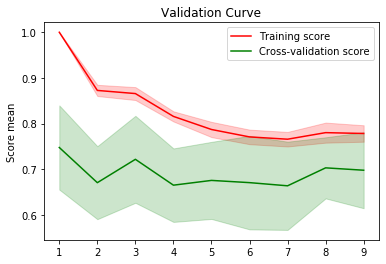

In [279]:
# validation curve - 크게 중요하지않음. gridSearch로 더 쉽게 확인가능. 중요한건 learningCurve
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(KNeighborsClassifier(), wdata.iloc[:,:-1], wdata.iloc[:,-1], cv=10, param_name='n_neighbors', param_range=range(1,10)) # 2개 떨어지므로 destructure
sklearn_evaluation.plot.validation_curve(train_score, test_score, range(1,10))

/home/ai35/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


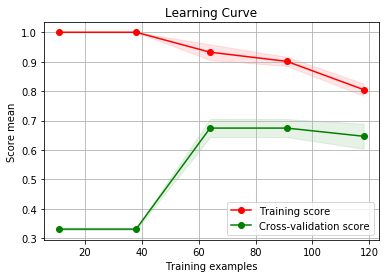

In [288]:
# learning curve - 데이터가 부족한지 아닌지 확인하는용도로도 가능
from sklearn.model_selection import learning_curve
train_sizes_abs, train_scores, test_scores =learning_curve(KNeighborsClassifier(), wdata.iloc[:,:-1], wdata.iloc[:,-1])
sklearn_evaluation.plot.learning_curve(train_scores, test_scores, train_sizes_abs)

In [289]:
from sklearn.pipeline import make_pipeline # pipeline보다 좀더 빠르게 만들때 사용`

In [296]:
mp = make_pipeline(StandardScaler(), MinMaxScaler())

In [297]:
vars(mp)

{'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1)))],
 'memory': None,
 'verbose': False}